# Final Fundamentals of datascience Project
In the below cell I have imported all required libraries

In [0]:
from scipy import stats     
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hw3_fds_feature_selection as fs

# data loading

In [78]:
# loading csv dataset into dataframe
df = pd.read_csv('Chirumamilla_Original.csv')
data = df.copy()
display(df.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [79]:
Features = df.columns
Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


## Imformation About Features
**age**: in years(continuous)

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked(Categorical)

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.(cactegorical)

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse(categorical)

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces(categorical)

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried(categorical)

**race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other(categorical)

**sex**: Female, Male.(categorical)

**capital-gain**: continuous.

**capital-loss**: continuous.

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


### Finding unique values from each coulmn
in the below cell i found unique values for each coulmn 

In [0]:
unique_values = []
features = data.columns
for feature in features :
    unique = data[feature].unique().shape[0]

### Division of categorical and continuous features
in the below cell i have divided all features into continuous and categorical features

In [81]:
Numerical_Features = data._get_numeric_data().columns
list1 = []
list1.append(Numerical_Features[1])
Continuous_Features = set(Numerical_Features) - set(list1)
Categorical_Features = set(features) - set(Numerical_Features) 
Categorical_Features.update(list1)
print("Continuous features are {}".format(Continuous_Features))
print("categorical features are {}".format(Categorical_Features))

Continuous features are {'age', 'hours-per-week', 'capital-loss', 'capital-gain'}
categorical features are {'income', 'relationship', 'education-num', 'occupation', 'native-country', 'education_level', 'marital-status', 'workclass', 'race', 'sex'}


### preparation of data quality report
In the below cells I have prepared data quality report table


In [0]:
# below code is used to found number of elements in each column
count_values =[]
for feature in Continuous_Features :
    count_values.append(data[feature].count())


# below code is used to found number of mising values  in each column
mssing_values = data.isna()
missing_values_count = mssing_values.sum()
missing_values_percent_list = []
for feature in Continuous_Features :
    missing_values_percent_list.append((missing_values_count[feature]/data.shape[0])*100)
missing_values_percent_list


# Below code is used to found unique values in the columns
Con_unique_values = []
for feature in Continuous_Features :
    unique = data[feature].unique().shape[0]
    Con_unique_values.append(unique)


# finding the minimum value in the columns
minimum_values = data[Continuous_Features].min()

# finding the 25th quartile in the columns
q1 = data[Continuous_Features].quantile(0.25)

# finding the mean in the columns
mean_values = data[Continuous_Features].mean()

# finding the median in the coumns
median_values = data[Continuous_Features].median()

# finding the 75th quartile in the columns
q3 = data[Continuous_Features].quantile(0.75)

# finding the maximum value in the columns
maximum_values = data[Continuous_Features].max()

# finding the standard deviation in the columns
Standatrd_deviation = data[Continuous_Features].std()

In [83]:
# formation of data quality report and display the data quality report
Continuous_Features_ABT = pd.DataFrame(data = Continuous_Features,columns=['feature'] )
Continuous_Features_ABT['count'] = count_values
Continuous_Features_ABT['missing values(%)'] = missing_values_percent_list
Continuous_Features_ABT['Unique values'] =  Con_unique_values
Continuous_Features_ABT['minimum value'] = minimum_values.values
Continuous_Features_ABT['1ST Quartile'] = q1.values
Continuous_Features_ABT['mean'] = mean_values.values
Continuous_Features_ABT['median'] = median_values.values
Continuous_Features_ABT['3RD Quartile'] = q3.values
Continuous_Features_ABT['maximum value'] = maximum_values.values
Continuous_Features_ABT['standard deviation'] = Standatrd_deviation.values
print("Data Quality Report for Continuous features")
display(Continuous_Features_ABT)

Data Quality Report for Continuous features


,feature,count,missing values(%),Unique values,minimum value,1ST Quartile,mean,median,3RD Quartile,maximum value,standard deviation
0,age,45222,0.0,74,17.0,28.0,38.547941,37.0,47.0,90.0,13.217870
1,hours-per-week,45222,0.0,96,1.0,40.0,40.938017,40.0,45.0,99.0,12.007508
2,capital-loss,45222,0.0,97,0.0,0.0,88.595418,0.0,0.0,4356.0,404.956092
3,capital-gain,45222,0.0,121,0.0,0.0,1101.430344,0.0,0.0,99999.0,7506.430084


In [0]:
# finding number of values in the columns
count_values =[]
for feature in Categorical_Features :
    count_values.append(data[feature].count())


# findng missing values in the columns
mssing_values = data.isna()
missing_values_count = mssing_values.sum()
missing_values_percent_list = []
for feature in Categorical_Features :
    missing_values_percent_list.append((missing_values_count[feature]/data.shape[0])*100)
missing_values_percent_list

# finding unique values in the categorical columns
Cat_unique_values = []
for feature in Categorical_Features :
    unique = data[feature].unique().shape[0]
    Cat_unique_values.append(unique)

# finding mode-1 in the categorical columns    
mode_values1 = []

# finding mode-1 frequency in the categorical columns
mode_freq_values1 = []

# finding mode-1 percentage in the categorical columns
mode1_prec_values = []

# finding mode-2  in the categorical columns
mode_values2 = []

# finding mode 2 frequency in the categorical columns
mode_freq_values2 = []

# finding mode-2 percentage in the categorical columns
mode2_precen_values = []

new_data = data
Cate_df = new_data.drop(columns= Continuous_Features)
for feature in Categorical_Features :
    unique_value_count = new_data[feature].value_counts()
    mode_values1.append(unique_value_count.index[0])
    mode_values2.append(unique_value_count.index[1])
    mode_freq_values1.append(unique_value_count.values[0])
    mode_freq_values2.append(unique_value_count.values[1])
    mode1_prec_values.append((unique_value_count.values[0]/data.shape[0])*100)
    mode2_precen_values.append((unique_value_count.values[1]/data.shape[0])*100)

    

In [85]:

# formation of data quality report and displaying data quality report 
Categorical_Features_ABT = pd.DataFrame(data = Categorical_Features,columns=['feature'] )
Categorical_Features_ABT['count'] = count_values
Categorical_Features_ABT['missing values(%)'] = missing_values_percent_list
Categorical_Features_ABT['mode'] =  mode_values1
Categorical_Features_ABT['mode frequency'] =  mode_freq_values1
Categorical_Features_ABT['mode percentage'] =  mode1_prec_values
Categorical_Features_ABT['2nd mode'] =  mode_values2
Categorical_Features_ABT['2nd mode frequency'] =  mode_freq_values2
Categorical_Features_ABT['2nd mode percentage'] =  mode2_precen_values
print('Data Quality Report for Categorical Features ')
display(Categorical_Features_ABT)

Data Quality Report for Categorical Features 


,feature,count,missing values(%),mode,mode frequency,mode percentage,2nd mode,2nd mode frequency,2nd mode percentage
0,income,45222,0.0,<=50K,34014,75.215603,>50K,11208,24.784397
1,relationship,45222,0.0,Husband,18666,41.276370,Not-in-family,11702,25.876786
2,education-num,45222,0.0,9,14783,32.689841,10,9899,21.889788
3,occupation,45222,0.0,Craft-repair,6020,13.312105,Prof-specialty,6008,13.285569
4,native-country,45222,0.0,United-States,41292,91.309540,Mexico,903,1.996816
5,education_level,45222,0.0,HS-grad,14783,32.689841,Some-college,9899,21.889788
6,marital-status,45222,0.0,Married-civ-spouse,21055,46.559197,Never-married,14598,32.280748
7,workclass,45222,0.0,Private,33307,73.652205,Self-emp-not-inc,3796,8.394144
8,race,45222,0.0,White,38903,86.026713,Black,4228,9.349432
9,sex,45222,0.0,Male,30527,67.504754,Female,14695,32.495246


### Outlier Detection and Handling
In the below cell i detected Outlier and handled using lower and upper values

lower = mean - 3*std

upper = mean + 3*std

In [86]:
# finding outliers and handling outliers
for feature in Continuous_Features :
    mean  = data[feature].mean()
    std = data[feature].std()
    lower = mean - 3*std
    upper = mean + 3*std
    d = df.shape[0]
    for i in   range(d):
        if data[feature][i] < lower  :
           data[feature][i] = mean
        elif data[feature][i] > upper :
             data[feature][i] = mean
           

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [0]:
# findng and handling mssing values
def Handling_missing_values(feature) :
    x = mssing_values.shape[0]
    for i in range(x) :
        if mssing_values[feature][i] == True :
           if feature in Continuous_Features :
              data[feature][i] = data[feature].mean()
           else: 
               data[feature][i] = data[feature].mode()
features = data.columns
for feature in features :
    Handling_missing_values(feature)

## visualization

age


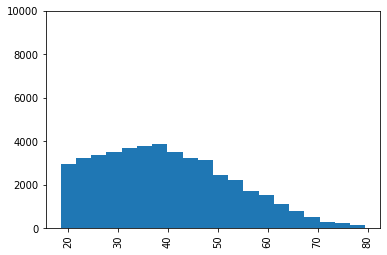

workclass


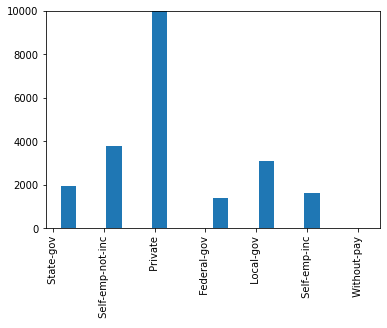

education_level


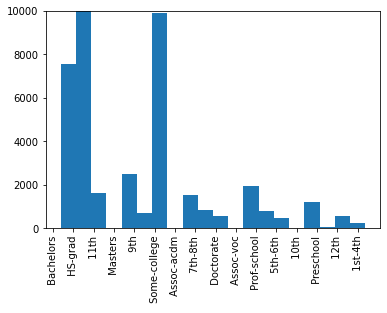

education-num


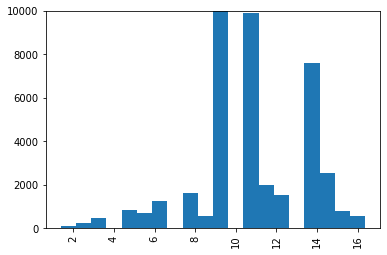

marital-status


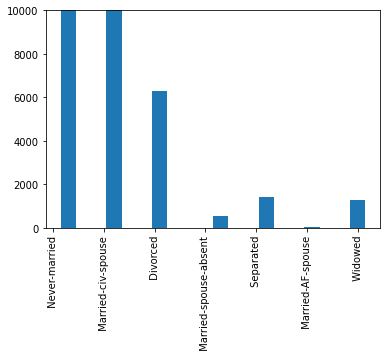

occupation


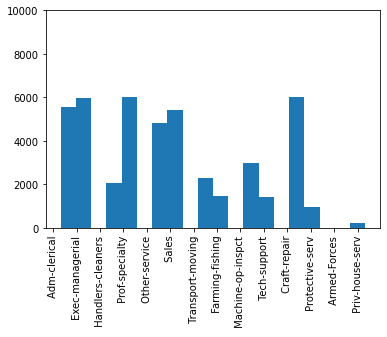

relationship


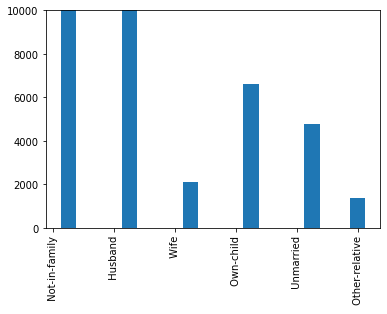

race


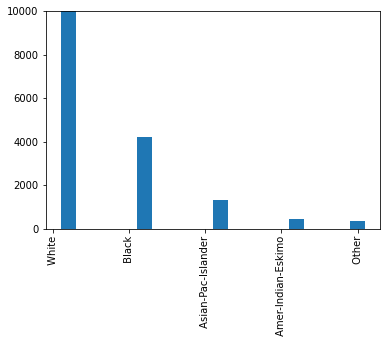

sex


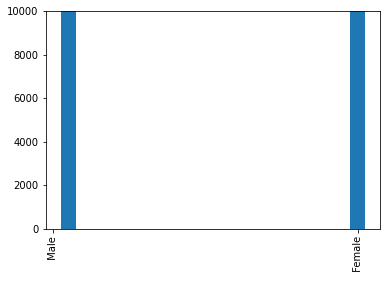

capital-gain


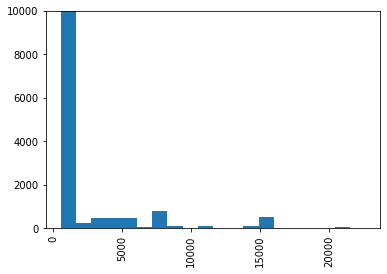

capital-loss


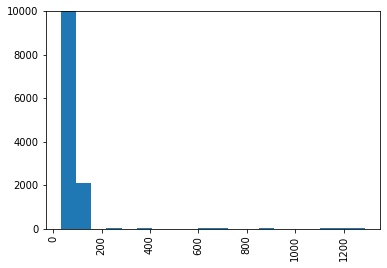

hours-per-week


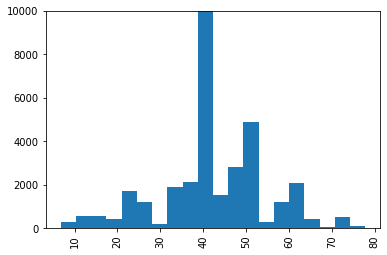

native-country


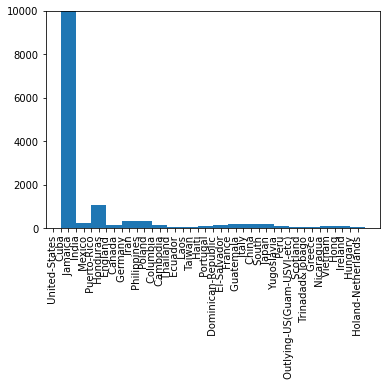

income


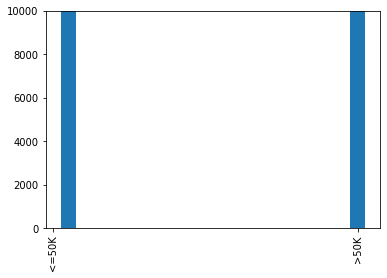

In [88]:
for feature in features :
    print(feature)
    plt.hist(data[feature],bins = 20,align='right')
    plt.ylim((0, 10000))
    # plt.yticks([0, 500, 1000, 1500, 2000])
    plt.xticks( rotation='vertical')
    plt.show()

### normalization of data
capital loss and capital gain are highly skewed not uniform we can normalize data and convert into uniform data 

I would normalize the data using MinMaxScaler using sklearn library

In [89]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
discriptive_features = data.drop('income',axis =1)
discriptive_DF = pd.DataFrame(data = discriptive_features)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
normalized_DF = pd.DataFrame(data = discriptive_DF)
normalized_DF[numerical] = scaler.fit_transform(discriptive_DF[numerical])
display(normalized_DF.head(n = 5))
normalized_DF.to_csv('normalized_dataset.csv')

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.360656,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.098639,0.0,0.492958,United-States
1,0.540984,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.112676,United-States
2,0.344262,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.492958,United-States
3,0.590164,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.492958,United-States
4,0.180328,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.492958,Cuba


### feature selection 
I used homework 3 file as library and imported it as fs for feature selection and selected top k highest  imformation gain features  

In [90]:
target = 'income'
dataset = normalized_DF
dataset['income'] = df.income
K_features =  fs.IUFS(target, dataset, 10, 'gini')
feature_selected_DF = normalized_DF[K_features]
feature_selected_DF


,feature,Imformation Gain
0,age,0.038465
0,workclass,0.009953
0,education_level,0.049434
0,education-num,0.049434
0,marital-status,0.075101
0,occupation,0.044645
0,relationship,0.077144
0,race,0.003729
0,sex,0.017356
0,capital-gain,0.064236


,relationship,marital-status,capital-gain,education_level,education-num,occupation,age,hours-per-week,sex,workclass
0,Not-in-family,Never-married,0.098639,Bachelors,0.800000,Adm-clerical,0.360656,0.492958,Male,State-gov
1,Husband,Married-civ-spouse,0.000000,Bachelors,0.800000,Exec-managerial,0.540984,0.112676,Male,Self-emp-not-inc
2,Not-in-family,Divorced,0.000000,HS-grad,0.533333,Handlers-cleaners,0.344262,0.492958,Male,Private
3,Husband,Married-civ-spouse,0.000000,11th,0.400000,Handlers-cleaners,0.590164,0.492958,Male,Private
4,Wife,Married-civ-spouse,0.000000,Bachelors,0.800000,Prof-specialty,0.180328,0.492958,Female,Private
...,...,...,...,...,...,...,...,...,...,...
45217,Own-child,Never-married,0.000000,Bachelors,0.800000,Prof-specialty,0.262295,0.492958,Male,Private
45218,Not-in-family,Divorced,0.000000,Bachelors,0.800000,Prof-specialty,0.360656,0.436620,Female,Private
45219,Husband,Married-civ-spouse,0.000000,Bachelors,0.800000,Prof-specialty,0.344262,0.633803,Male,Private
45220,Own-child,Divorced,0.247505,Bachelors,0.800000,Adm-clerical,0.442623,0.492958,Male,Private


### feature tranformation

In [91]:
Feature_Transformed_DF = pd.get_dummies(feature_selected_DF)
Feature_Transformed_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   capital-gain                           45222 non-null  float64
 1   education-num                          45222 non-null  float64
 2   age                                    45222 non-null  float64
 3   hours-per-week                         45222 non-null  float64
 4   relationship_ Husband                  45222 non-null  uint8  
 5   relationship_ Not-in-family            45222 non-null  uint8  
 6   relationship_ Other-relative           45222 non-null  uint8  
 7   relationship_ Own-child                45222 non-null  uint8  
 8   relationship_ Unmarried                45222 non-null  uint8  
 9   relationship_ Wife                     45222 non-null  uint8  
 10  marital-status_ Divorced               45222 non-null  uint8  
 11  ma

In [0]:
Feature_Transformed_DF['income'] = df.income
Feature_Transformed_DF.to_csv('Chirumamilla_pp.csv')

In [19]:
!ls

Chirumamilla_Original.csv  drive	 normalized_dataset.csv  sample_data
Chirumamilla_pp.csv	   hw3_fds_3.py  __pycache__
